### Structuratech
##### - Predictive Analysis of Concrete Strength Using Big Data Techniques.
###### - Submitted by- 
###### - Varun Kumar Kashyap   502304212
###### - Danish Madaan         502304224


### Step 1- collection of data from various sources.

In [4]:
# Importing all neccesary libraries required for this project.

import os
import time
import json
!pip install tweepy
import tweepy
import requests
import pandas as pd
!pip install pytube
from pytube import YouTube
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO


In [6]:
# Setting up directories
base_folder = 'project_data'
os.makedirs(base_folder, exist_ok=True)

In [7]:
keywords = [
    "Concrete technology",
    "Green concrete",
    "Big data in construction",
    "Concrete predictive analysis",
    "ML model for concrete predictive analysis",
    "Sustainable concrete construction",
    "Smart construction technologies",
    "Digital transformation in construction"
]


### 200 Textual Images 


#### - First we will download 200 images and perform ocr on it.

In [2]:
import os
import time
import requests
from PIL import Image
from io import BytesIO
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager

# Defining search keywords and output folder
keywords = [
    "Concrete technology", "Green Concrete", "Big data in construction",
    "Concrete predictive analysis", "ML model for concrete predictive analysis",
    "Sustainable concrete construction", "Smart construction technologies",
    "Digital transformation in construction"
]
output_folder = 'textual_images'
os.makedirs(output_folder, exist_ok=True)

# Setup Selenium with ChromeDriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in headless mode to avoid opening a browser window
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

def download_images(keyword, num_images=25):
    print(f"Downloading images for: {keyword}")
    driver.get("https://www.bing.com/images")
    
    # Search for the keyword on Bing Images
    search_box = driver.find_element(By.NAME, 'q')
    search_box.send_keys(keyword)
    search_box.send_keys(Keys.RETURN)
    time.sleep(2)  # Allow time for the page to load
    
    # Scroll to load more images
    for _ in range(2):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
    
    # Find image elements
    image_elements = driver.find_elements(By.CSS_SELECTOR, "img.mimg")
    print(f"Found {len(image_elements)} images for '{keyword}'")

    # Download images
    count = 200
    for img in image_elements:
        if count >= num_images:
            break
        try:
            img_url = img.get_attribute('src') or img.get_attribute('data-src')
            if img_url and img_url.startswith('http'):
                response = requests.get(img_url)
                img_data = Image.open(BytesIO(response.content))
                img_data.save(os.path.join(output_folder, f"{keyword.replace(' ', '_')}_{count}.jpg"))
                print(f"Downloaded {count+1}/{num_images} for {keyword}")
                count += 1
        except Exception as e:
            print(f"Failed to download image: {e}")

# Download images for each keyword
for keyword in keywords:
    download_images(keyword, num_images=25)

driver.quit()
print("Image download completed.")


Found 126 images for 'Concrete technology'
Found 126 images for 'Green Concrete'
Found 102 images for 'Big data in construction'
Found 105 images for 'Concrete predictive analysis'
Found 105 images for 'ML model for concrete predictive analysis'
Found 103 images for 'Sustainable concrete construction'
Found 103 images for 'Smart construction technologies'
Found 101 images for 'Digital transformation in construction'
Image download completed.


### Performing OCR and aggregating the text.


In [3]:
import os
from PIL import Image
import pytesseract


pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'  

# Defining folder containing images and output file for aggregated text
input_folder = 'textual_images'
output_file = 'aggregated_image_text.txt'

def ocr_images(input_folder, output_file):
    aggregated_text = ""
    
    # Processing each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            image_path = os.path.join(input_folder, filename)
            print(f"Processing {filename}...")
            
            # Performing OCR on the image
            img = Image.open(image_path)
            text = pytesseract.image_to_string(img)
            
            # Appending the text to the aggregate text variable
            aggregated_text += text + "\n"
    
    # Saving aggregated text to output file
    with open(output_file, 'w') as f:
        f.write(aggregated_text)
    
    print(f"OCR completed. Aggregated text saved to '{output_file}'.")

# Running the OCR and aggregation function
ocr_images(input_folder, output_file)


Processing 63.jpg...
Processing 39 copy.jpg...
Processing Image_15.jpg...
Processing Image_16 (1).jpg...
Processing Image_10 (1) copy.jpg...
Processing Image_14.jpg...
Processing Image_13 (2).jpg...
Processing 60.jpg...
Processing Image_16.jpg...
Processing 32 copy.jpg...
Processing Image_17.jpg...
Processing 59.jpg...
Processing 65.jpg...
Processing Image_13.jpg...
Processing 66 copy.jpg...
Processing 67 copy.jpg...
Processing 59 copy.jpg...
Processing Image_1 (2) copy.jpg...
Processing Image_12.jpg...
Processing 64.jpg...
Processing 11 copy.jpg...
Processing 10 copy.jpg...
Processing 66.jpg...
Processing Image_13 (3).jpg...
Processing Image_1 copy.jpg...
Processing 25 copy.jpg...
Processing 24 copy.jpg...
Processing Image_10.jpg...
Processing Image_17 (1).jpg...
Processing Image_12 (2).jpg...
Processing Image_11.jpg...
Processing 67.jpg...
Processing 14.jpg...
Processing 28.jpg...
Processing Image_18 (3).jpg...
Processing 60 copy.jpg...
Processing 28 copy.jpg...
Processing Image_1 (1

### 10 MP3 Expert Discussions

#### - Now we will download 10 mp3 expert decisions and perform ocr on it

In [4]:
pip install --upgrade pytube


Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
import yt_dlp

# Specify the path to ffmpeg
ffmpeg_path = '/opt/homebrew/bin/ffmpeg'  # Update this path to your ffmpeg location

output_folder = 'project_data/mp3_discussions'
os.makedirs(output_folder, exist_ok=True)

# List of YouTube video URLs
video_urls = [
    'https://youtu.be/YCgB6fT8_-o?si=D5knODIkLxOABS0m',
    'https://youtu.be/wmoy27EZ8y0?si=9YBVMXkG9WWrAPPe',
    'https://youtu.be/NhIv7mII9_4?si=VoIg3KN40Tu9MLa4',
    'https://youtu.be/HpMXRll7EbU?si=wB1cFlEqa5v6xc65',
    'https://youtu.be/Dh3__pFKECE?si=7g5wKq0MMp-ZKS1-',
    'https://youtu.be/n9kwM1FL3iI?si=o2zoHlZ3bDzXNeKK',
    'https://youtu.be/t6RLpST1cys?si=sIGrrTTistVmV-Pu',
    'https://youtu.be/bsQBSVJoV04?si=5U1aIJt27_6EZa5w',
    'https://youtu.be/TC5cWh-YTKQ?si=LJ9I2FH3NSOPLFRk',
    'https://youtu.be/JwEQusRJ-sI?si=ii1eIxfOLRNa396b'
]

def download_audio_yt_dlp():
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': os.path.join(output_folder, '%(title)s.%(ext)s'),
        'ffmpeg_location': ffmpeg_path,  # Path to ffmpeg
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],
        'postprocessor_args': [
            '-write_xing', '0'  # To ensure proper MP3 headers
        ]
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        for url in video_urls:
            try:
                print(f"Downloading audio from {url}...")
                ydl.download([url])
            except Exception as e:
                print(f"Failed to download {url}: {e}")

# Run the download function
download_audio_yt_dlp()


[youtube] Extracting URL: https://youtu.be/YCgB6fT8_-o?si=D5knODIkLxOABS0m
[youtube] YCgB6fT8_-o: Downloading webpage
[youtube] YCgB6fT8_-o: Downloading ios player API JSON
[youtube] YCgB6fT8_-o: Downloading mweb player API JSON
[youtube] YCgB6fT8_-o: Downloading m3u8 information
[info] YCgB6fT8_-o: Downloading 1 format(s): 251
[download] Destination: project_data/mp3_discussions/Varun Bhartiya's live session at DCW 2024 on how AI is shaping the Future of Construction.webm
[download] 100% of   19.23MiB in 00:00:01 at 17.32MiB/s  
[ExtractAudio] Destination: project_data/mp3_discussions/Varun Bhartiya's live session at DCW 2024 on how AI is shaping the Future of Construction.mp3
Deleting original file project_data/mp3_discussions/Varun Bhartiya's live session at DCW 2024 on how AI is shaping the Future of Construction.webm (pass -k to keep)
[youtube] Extracting URL: https://youtu.be/wmoy27EZ8y0?si=9YBVMXkG9WWrAPPe
[youtube] wmoy27EZ8y0: Downloading webpage
[youtube] wmoy27EZ8y0: Downloa

### Performing OCR using Speech recognition 

In [7]:
pip install vosk


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.9 MB/s eta 0:00:0000:0100:01
  Created wheel for srt: filename=srt-3.5.3-py3-none-any.whl size=22429 sha256=c3a6cce3320a2bd0e71541acba6f6908d9d60e3928532e6f79e4a3e3c0fa5185
  Stored in directory: /Users/varunkashyap/Library/Caches/pip/wheels/1f/43/f1/23ee9119497fcb57d9f7046fbf34c6d9027c46a1fa7824cf08
Successfully built srt
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Add the directory where ffprobe is installed to the PATH
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

from pydub import AudioSegment

# Set the correct paths for ffmpeg and ffprobe
AudioSegment.converter = "/opt/homebrew/bin/ffmpeg"
AudioSegment.ffprobe = "/opt/homebrew/bin/ffprobe"

# Print paths to verify
print("FFmpeg path:", AudioSegment.converter)
print("FFprobe path:", AudioSegment.ffprobe)


FFmpeg path: /opt/homebrew/bin/ffmpeg
FFprobe path: /opt/homebrew/bin/ffprobe


In [15]:
import whisper
import os

# Load the Whisper model (you can choose 'base', 'small', 'medium', 'large')
model = whisper.load_model("large")  

# Path to the folder containing MP3 files
audio_folder = 'project_data/mp3_discussions'  
output_file = 'whisper_transcriptions.txt'

def transcribe_whisper(file_path):
    """Transcribe the audio file using Whisper."""
    result = model.transcribe(file_path)
    return result['text']

def aggregate_transcriptions():
    """Aggregate transcriptions from all MP3 files in the specified folder."""
    all_text = ""
    for file in os.listdir(audio_folder):
        if file.endswith('.mp3'):
            full_path = os.path.join(audio_folder, file)
            print(f"Transcribing {file} with Whisper...")
            try:
                transcription = transcribe_whisper(full_path)
                print(f"Transcription for {file}: {transcription}")
                all_text += transcription + "\n"
            except Exception as e:
                print(f"Error transcribing {file}: {e}")

    # Save the aggregated transcriptions to a file
    with open(output_file, 'w') as f:
        f.write(all_text)
    print(f"Transcriptions saved to {output_file}")

# Run transcription
aggregate_transcriptions()


100%|█████████████████████████████████████| 2.88G/2.88G [09:24<00:00, 5.47MiB/s]
/opt/anaconda3/lib/python3.11/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e

Transcribing Why is Big Data crucial for the construction industry？.mp3 with Whisper...


/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Why is Big Data crucial for the construction industry？.mp3:  In today's day and age, there is stupendous amounts of data that is generated every day from countless devices. According to research, 44 quintillion bytes of data were created every day in 2020, and it's estimated that by 2025, there would be 175 zettabytes of data in the global data sphere. Thus, the term big data is vital to understand, learn and manage all the data that is being gathered. Big data can be analyzed for insights that improve decisions. And give confidence for making strategic decisions. For the construction and infrastructure industry, this isn't so different, with Maxwell Geosystems being ideally placed in this area. Big data is used in every stage of the construction process, in order to improve efficiency and productivity. Maxwell Geosystems' cloud-based mission OS is already helping transform the construction and infrastructure industry, throughout all phases of the project. With fast a

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for New Trends in Concrete Technology.mp3:  Do you think that concrete is boring? It is just a mixture of different materials since early centuries, so what now? Check this out. What are the new trends in concrete technology? Technology and other breakthroughs have had a significant impact on many different sorts of business. The various technologies that are now being developed have an impact on the concrete industry in a very specific way. IoT or Internet of Things The use of technical tools and current Internet applications in the construction process to increase project efficiency is referred to as IoT in construction. To manage and keep an eye on the environment, it makes use of network sensors and actuators. IoT in construction allows for collecting data responsibly. This allows for the use of data responsibly to determine the activity, conditions, performance on the construction site, and transmission of this information to a central dashboard where data is evaluat

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for How AI is being used in the Construction Industry. - Rise of AI In Construction Industry.mp3:  Hey there, AI enthusiasts! Welcome back to AI Tube, the one-stop destination for everything AI. Today, we'll dive into the fascinating world of AI in the construction industry. Imagine a world where AI-driven robots construct skyscrapers, drones survey construction sites, and software predicts project timelines with impeccable accuracy. Sounds like science fiction? Well, that's the reality in the construction industry today. If you're as excited as we are, don't forget to hit that like button and subscribe for more amazing content. Section 1. How AI is transforming construction management. Did you know? AI is revolutionizing the way construction projects are managed. Let me tell you a story about John, a construction manager who faced multiple delays and failures. He was a construction manager who was working on projects, which was really hard for him to manage. But then, a 

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Industrializing Predictive Analytics On Big Data Infrastructure - Laurent Tessier.mp3:  I will introduce myself. I'm an agronomy engineer by design. I have a master's degree in physics and a PhD in applied math. I used to be a scientist as well, on top of a data scientist. I used R. That was a long time ago. I used S plus before using R. Then I quit. I said, no more of that. I don't want to program anymore. This is fun, but not your whole life long. So I became something else, a consultant. Then a company called KXEN hired me as a presales. KXEN was automating predictive analytics. Then that company was acquired by SAP. So that's why I'm there now. But I'm happy. So you know. And well, maybe we can start now. Yes, I think we're ready to go. Okay. Take it away. So are you still searching ROIs in your big data analytics? I think you should read that. That's an interesting post that we have on KD Nuggets at the moment. Okay. But that's true. Many people or many companies

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Exploring Green Building and the Future of Construction.mp3:  This episode is brought to you by Brilliant. Click the link in the description below. A lot of focus is put on generating cleaner energy for a sustainable future. But that's just one piece of the puzzle. What if we could dramatically reduce our energy consumption just by changing the way we build our office buildings and skyscrapers? Imagine a skyscraper with smart windows and walls made from fungus. Yes, fungus. Let's explore a green building and the future of construction. And can going net zero really make a difference? I'm Matt Ferrell. Welcome to Undecided. INTRO Building office buildings and skyscrapers with thousands of pounds of concrete, steel, and other materials is a major contributor to pollution and energy use. But it's more than that. Our homes and office buildings' lighting, heating and cooling, poor insulation, and integration into the surrounding environment have a lasting impact on energy 

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for SYNCHRO： 4D Planning ｜ Unlocking the Future of Digital Construction.mp3:  Construction is building something from nothing. Construction is everywhere, spanning across all industries and transforming landscapes every day. But how does construction become reality? It's through detailed planning and effective communication. Storytelling is essential in bringing construction projects to life. This is what Synchro does better than anybody else. From project plans to site logistics, Synchro ensures every detail is communicated, minimizing disruptions to the public as we go about our daily lives. Unlock the future of digital construction with 4D planning and join our exclusive 9-part series, starting September 3rd and concluding with a roundtable discussion on October 1st. Where industry leaders talk about how they leverage innovative technology solutions, like the technology of the future, and how they can make the future of the future more possible. Like Synchro 4D, to tel

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Green Building Explained.mp3:  Hello friends, Green building is a smart way of constructing buildings that helps protect the environment and keeps people healthy. It involves designing, constructing and maintaining structures in a way that doesn't harm nature and keeps us safe. The goal is to reduce the impact on the environment and make sure people stay well. Green building means constructing buildings in a way that is good for the environment and saves energy and resources. It looks at all parts of the building and managing them to be efficient and not harm the environment. The goal is to create structures that use less energy, use materials wisely and are responsible to the environment. Now let us discuss some key principles and concepts associated with green building. Energy efficiency Green buildings use smart designs to save energy. They choose things like energy-saving appliances, lights and heating or cooling systems. They also like to use renewable energy suc

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for 10 Eco-Friendly Building Materials ｜ Sustainable Design.mp3:  This video was sponsored by the Nick Morne Foundation. Concrete and steel production releases tons of greenhouse gases into the atmosphere every year, contributing to air pollution and climate change. Fortunately, there are some more sustainable materials which can be used for construction. In this video, we're going to be taking a look at some alternative yet eco-friendly materials, such as seaweed, mushrooms and even coffee, and their practical applications in construction. Formally used as wine stoppers or bulletin boards, in recent years, cork has been found to be one of the most sustainable building materials in the world. With eco-minded construction companies in search of more lightweight, low-cost, sustainable and versatile building materials that not only are aesthetically pleasing, but also effectively insulate and provide long-term protection from the elements, cork ticks all of the boxes. Cork i

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Varun Bhartiya's live session at DCW 2024 on how AI is shaping the Future of Construction.mp3:  In order to adopt AI, I think there's also a change of mindset required. Every company is using AI for certain bits and pieces. It is maturing slowly. So we have to, for significant period of time, work in collaboration with AI. This episode is recorded live at Digital Construction Week at the Excel in London, where I interviewed some of the best and brightest in the built environment for a revealing look at innovation and technology. Varun Bhatia is the co-founder and CEO of EncircleTech, a company at the forefront of empowering passionate innovators in the architecture, engineering, construction and manufacturing industry, providing disruptive solutions that reduce time to market and exceed business goals. From Varun's early days blending coding and 3D visualizations, along with the integration of AI, machine learning and other groundbreaking technologies, EncircleTech ha

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for 22 amazing construction innovations.mp3:  សូវាប់ពីបានប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពី� សូវាប់បានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបា�brance�ាន។សុតែលereal្និូម� demonic បាន់តែង雅្ចនែ� episode ហើយមទ on No វើញស្តែ 1 សូវាប់ពីបានប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពី� សូមភិនចុងះដាងសាប់ពីប្រាប់ពីជានថ្រេទលោះហើយ សែង់ខាង់ពីប់ពីទា�atonក្រាប់ពីប្រាប់ពីប្រាប់ពីជាសរាប់ពីប្រាប់ពី� សូវាប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់ Allakh presumably 8 Ugh tan ជeschក្សូវិ parfait សុ្វភេ 녹្វាប់ ខៃបែបុ�reeeler និងពីកនឹកមួយរាប់។ Interior សូវបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបាន
Transcriptions saved to whisper_transcriptions.txt


In [15]:
import whisper
import os

# Load the Whisper model 
model = whisper.load_model("large")  

# Path to the folder containing MP3 files
audio_folder = 'project_data/mp3_discussions'  
output_file = 'whisper_transcriptions.txt'

def transcribe_whisper(file_path):
    """Transcribe the audio file using Whisper."""
    result = model.transcribe(file_path)
    return result['text']

def aggregate_transcriptions():
    """Aggregate transcriptions from all MP3 files in the specified folder."""
    all_text = ""
    for file in os.listdir(audio_folder):
        if file.endswith('.mp3'):
            full_path = os.path.join(audio_folder, file)
            print(f"Transcribing {file} with Whisper...")
            try:
                transcription = transcribe_whisper(full_path)
                print(f"Transcription for {file}: {transcription}")
                all_text += transcription + "\n"
            except Exception as e:
                print(f"Error transcribing {file}: {e}")

    # Save the aggregated transcriptions to a file
    with open(output_file, 'w') as f:
        f.write(all_text)
    print(f"Transcriptions saved to {output_file}")

# Run transcription
aggregate_transcriptions()


100%|█████████████████████████████████████| 2.88G/2.88G [09:24<00:00, 5.47MiB/s]
/opt/anaconda3/lib/python3.11/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e

Transcribing Why is Big Data crucial for the construction industry？.mp3 with Whisper...


/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Why is Big Data crucial for the construction industry？.mp3:  In today's day and age, there is stupendous amounts of data that is generated every day from countless devices. According to research, 44 quintillion bytes of data were created every day in 2020, and it's estimated that by 2025, there would be 175 zettabytes of data in the global data sphere. Thus, the term big data is vital to understand, learn and manage all the data that is being gathered. Big data can be analyzed for insights that improve decisions. And give confidence for making strategic decisions. For the construction and infrastructure industry, this isn't so different, with Maxwell Geosystems being ideally placed in this area. Big data is used in every stage of the construction process, in order to improve efficiency and productivity. Maxwell Geosystems' cloud-based mission OS is already helping transform the construction and infrastructure industry, throughout all phases of the project. With fast a

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for New Trends in Concrete Technology.mp3:  Do you think that concrete is boring? It is just a mixture of different materials since early centuries, so what now? Check this out. What are the new trends in concrete technology? Technology and other breakthroughs have had a significant impact on many different sorts of business. The various technologies that are now being developed have an impact on the concrete industry in a very specific way. IoT or Internet of Things The use of technical tools and current Internet applications in the construction process to increase project efficiency is referred to as IoT in construction. To manage and keep an eye on the environment, it makes use of network sensors and actuators. IoT in construction allows for collecting data responsibly. This allows for the use of data responsibly to determine the activity, conditions, performance on the construction site, and transmission of this information to a central dashboard where data is evaluat

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for How AI is being used in the Construction Industry. - Rise of AI In Construction Industry.mp3:  Hey there, AI enthusiasts! Welcome back to AI Tube, the one-stop destination for everything AI. Today, we'll dive into the fascinating world of AI in the construction industry. Imagine a world where AI-driven robots construct skyscrapers, drones survey construction sites, and software predicts project timelines with impeccable accuracy. Sounds like science fiction? Well, that's the reality in the construction industry today. If you're as excited as we are, don't forget to hit that like button and subscribe for more amazing content. Section 1. How AI is transforming construction management. Did you know? AI is revolutionizing the way construction projects are managed. Let me tell you a story about John, a construction manager who faced multiple delays and failures. He was a construction manager who was working on projects, which was really hard for him to manage. But then, a 

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Industrializing Predictive Analytics On Big Data Infrastructure - Laurent Tessier.mp3:  I will introduce myself. I'm an agronomy engineer by design. I have a master's degree in physics and a PhD in applied math. I used to be a scientist as well, on top of a data scientist. I used R. That was a long time ago. I used S plus before using R. Then I quit. I said, no more of that. I don't want to program anymore. This is fun, but not your whole life long. So I became something else, a consultant. Then a company called KXEN hired me as a presales. KXEN was automating predictive analytics. Then that company was acquired by SAP. So that's why I'm there now. But I'm happy. So you know. And well, maybe we can start now. Yes, I think we're ready to go. Okay. Take it away. So are you still searching ROIs in your big data analytics? I think you should read that. That's an interesting post that we have on KD Nuggets at the moment. Okay. But that's true. Many people or many companies

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Exploring Green Building and the Future of Construction.mp3:  This episode is brought to you by Brilliant. Click the link in the description below. A lot of focus is put on generating cleaner energy for a sustainable future. But that's just one piece of the puzzle. What if we could dramatically reduce our energy consumption just by changing the way we build our office buildings and skyscrapers? Imagine a skyscraper with smart windows and walls made from fungus. Yes, fungus. Let's explore a green building and the future of construction. And can going net zero really make a difference? I'm Matt Ferrell. Welcome to Undecided. INTRO Building office buildings and skyscrapers with thousands of pounds of concrete, steel, and other materials is a major contributor to pollution and energy use. But it's more than that. Our homes and office buildings' lighting, heating and cooling, poor insulation, and integration into the surrounding environment have a lasting impact on energy 

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for SYNCHRO： 4D Planning ｜ Unlocking the Future of Digital Construction.mp3:  Construction is building something from nothing. Construction is everywhere, spanning across all industries and transforming landscapes every day. But how does construction become reality? It's through detailed planning and effective communication. Storytelling is essential in bringing construction projects to life. This is what Synchro does better than anybody else. From project plans to site logistics, Synchro ensures every detail is communicated, minimizing disruptions to the public as we go about our daily lives. Unlock the future of digital construction with 4D planning and join our exclusive 9-part series, starting September 3rd and concluding with a roundtable discussion on October 1st. Where industry leaders talk about how they leverage innovative technology solutions, like the technology of the future, and how they can make the future of the future more possible. Like Synchro 4D, to tel

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Green Building Explained.mp3:  Hello friends, Green building is a smart way of constructing buildings that helps protect the environment and keeps people healthy. It involves designing, constructing and maintaining structures in a way that doesn't harm nature and keeps us safe. The goal is to reduce the impact on the environment and make sure people stay well. Green building means constructing buildings in a way that is good for the environment and saves energy and resources. It looks at all parts of the building and managing them to be efficient and not harm the environment. The goal is to create structures that use less energy, use materials wisely and are responsible to the environment. Now let us discuss some key principles and concepts associated with green building. Energy efficiency Green buildings use smart designs to save energy. They choose things like energy-saving appliances, lights and heating or cooling systems. They also like to use renewable energy suc

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for 10 Eco-Friendly Building Materials ｜ Sustainable Design.mp3:  This video was sponsored by the Nick Morne Foundation. Concrete and steel production releases tons of greenhouse gases into the atmosphere every year, contributing to air pollution and climate change. Fortunately, there are some more sustainable materials which can be used for construction. In this video, we're going to be taking a look at some alternative yet eco-friendly materials, such as seaweed, mushrooms and even coffee, and their practical applications in construction. Formally used as wine stoppers or bulletin boards, in recent years, cork has been found to be one of the most sustainable building materials in the world. With eco-minded construction companies in search of more lightweight, low-cost, sustainable and versatile building materials that not only are aesthetically pleasing, but also effectively insulate and provide long-term protection from the elements, cork ticks all of the boxes. Cork i

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for Varun Bhartiya's live session at DCW 2024 on how AI is shaping the Future of Construction.mp3:  In order to adopt AI, I think there's also a change of mindset required. Every company is using AI for certain bits and pieces. It is maturing slowly. So we have to, for significant period of time, work in collaboration with AI. This episode is recorded live at Digital Construction Week at the Excel in London, where I interviewed some of the best and brightest in the built environment for a revealing look at innovation and technology. Varun Bhatia is the co-founder and CEO of EncircleTech, a company at the forefront of empowering passionate innovators in the architecture, engineering, construction and manufacturing industry, providing disruptive solutions that reduce time to market and exceed business goals. From Varun's early days blending coding and 3D visualizations, along with the integration of AI, machine learning and other groundbreaking technologies, EncircleTech ha

/opt/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription for 22 amazing construction innovations.mp3:  សូវាប់ពីបានប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពី� សូវាប់បានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបា�brance�ាន។សុតែលereal្និូម� demonic បាន់តែង雅្ចនែ� episode ហើយមទ on No វើញស្តែ 1 សូវាប់ពីបានប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពីប្រាប់ពី� សូមភិនចុងះដាងសាប់ពីប្រាប់ពីជានថ្រេទលោះហើយ សែង់ខាង់ពីប់ពីទា�atonក្រាប់ពីប្រាប់ពីប្រាប់ពីជាសរាប់ពីប្រាប់ពី� សូវាប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់បានប់ Allakh presumably 8 Ugh tan ជeschក្សូវិ parfait សុ្វភេ 녹្វាប់ ខៃបែបុ�reeeler និងពីកនឹកមួយរាប់។ Interior សូវបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបានបាន
Transcriptions saved to whisper_transcriptions.txt


### 10 Ted Talks / Expert Discussions.


#### - The Code To Download the 10 Ted talks and then performing the OCR on it. 

In [23]:
import os
from yt_dlp import YoutubeDL

# Set output folder
output_folder = 'ted_talks'
os.makedirs(output_folder, exist_ok=True)

def download_ted_talks():
    ted_talks = [
        "https://youtu.be/czLeGETRMAA?si=IfAUJXb134zDik7I",
        "https://youtu.be/hRI0ymx_6aw?si=m_rmPsx6ODFV-25-",
        "https://youtu.be/0l_9NDZ8VZA?si=ypmOWU_IMXQfQ6-3",
        "https://youtu.be/oNrHu7E1u5U?si=mSgtARFy53ogBCYu",
        "https://youtu.be/UfVKdjdGBxg?si=VsadKgrM2rNUumH_",
        "https://youtu.be/hT4ZsaZsEgc?si=NK-dY-7kBiIQTrxv",
        "https://youtu.be/KAiWdme6EEM?si=c2Mw2CoIk_TyKy_I",
        "https://youtu.be/xJxf2rf3_ng?si=n6WsRC_o0hrxh1vd",
        "https://youtu.be/EumE_9qkXI8?si=9I7wFvXOFxNOXqcu",
        "https://youtu.be/JEUShQ7r_tE?si=2ZSSrj5GKECxjqG6"
    ]
    
    ydl_opts = {
        'outtmpl': os.path.join(output_folder, '%(title)s.%(ext)s'),  # Save in output folder
        'format': 'bestvideo+bestaudio/best',  # Download the best quality video and audio
        'noplaylist': True
    }

    with YoutubeDL(ydl_opts) as ydl:
        for url in ted_talks:
            try:
                print(f"Downloading {url}...")
                ydl.download([url])
            except Exception as e:
                print(f"Error downloading {url}: {e}")

# Run the download function
download_ted_talks()


[youtube] Extracting URL: https://youtu.be/czLeGETRMAA?si=IfAUJXb134zDik7I
[youtube] czLeGETRMAA: Downloading webpage
[youtube] czLeGETRMAA: Downloading ios player API JSON
[youtube] czLeGETRMAA: Downloading mweb player API JSON
[youtube] czLeGETRMAA: Downloading m3u8 information
[info] czLeGETRMAA: Downloading 1 format(s): 137+251
[download] Destination: ted_talks/How we could make carbon-negative concrete ｜ Tom Schuler.f137.mp4
[download] 100% of   59.56MiB in 00:00:10 at 5.67MiB/s     
[download] Destination: ted_talks/How we could make carbon-negative concrete ｜ Tom Schuler.f251.webm
[download] 100% of    3.62MiB in 00:00:00 at 5.41MiB/s   
[Merger] Merging formats into "ted_talks/How we could make carbon-negative concrete ｜ Tom Schuler.mkv"
Deleting original file ted_talks/How we could make carbon-negative concrete ｜ Tom Schuler.f251.webm (pass -k to keep)
Deleting original file ted_talks/How we could make carbon-negative concrete ｜ Tom Schuler.f137.mp4 (pass -k to keep)
[youtube]

### Now we will Perform OCR on it 

#### - First we will convert TED Talks to mp3 and then extract aggregate text 

In [14]:
import os
import yt_dlp

# Specify the path to ffmpeg
ffmpeg_path = '/opt/homebrew/bin/ffmpeg' 

output_folder = 'project_data/ted_talks_audio'
os.makedirs(output_folder, exist_ok=True)

# List of TED Talks video URLs
video_urls = [
        "https://youtu.be/czLeGETRMAA?si=IfAUJXb134zDik7I",
        "https://youtu.be/hRI0ymx_6aw?si=m_rmPsx6ODFV-25-",
        "https://youtu.be/0l_9NDZ8VZA?si=ypmOWU_IMXQfQ6-3",
        "https://youtu.be/oNrHu7E1u5U?si=mSgtARFy53ogBCYu",
        "https://youtu.be/UfVKdjdGBxg?si=VsadKgrM2rNUumH_",
        "https://youtu.be/hT4ZsaZsEgc?si=NK-dY-7kBiIQTrxv",
        "https://youtu.be/KAiWdme6EEM?si=c2Mw2CoIk_TyKy_I",
        "https://youtu.be/xJxf2rf3_ng?si=n6WsRC_o0hrxh1vd",
        "https://youtu.be/EumE_9qkXI8?si=9I7wFvXOFxNOXqcu",
        "https://youtu.be/JEUShQ7r_tE?si=2ZSSrj5GKECxjqG6"
]

def download_audio_yt_dlp():
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': os.path.join(output_folder, '%(title)s.%(ext)s'),
        'ffmpeg_location': ffmpeg_path,  # Path to ffmpeg
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],
        'postprocessor_args': [
            '-write_xing', '0'  # To ensure proper MP3 headers
        ]
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        for url in video_urls:
            try:
                print(f"Downloading audio from {url}...")
                ydl.download([url])
            except Exception as e:
                print(f"Failed to download {url}: {e}")

# Run the download function
download_audio_yt_dlp()

[youtube] Extracting URL: https://youtu.be/czLeGETRMAA?si=IfAUJXb134zDik7I
[youtube] czLeGETRMAA: Downloading webpage
[youtube] czLeGETRMAA: Downloading ios player API JSON
[youtube] czLeGETRMAA: Downloading mweb player API JSON
[youtube] czLeGETRMAA: Downloading m3u8 information
[info] czLeGETRMAA: Downloading 1 format(s): 251
[download] Destination: project_data/ted_talks_audio/How we could make carbon-negative concrete ｜ Tom Schuler.webm
[download] 100% of    3.62MiB in 00:00:00 at 4.54MiB/s   
[ExtractAudio] Destination: project_data/ted_talks_audio/How we could make carbon-negative concrete ｜ Tom Schuler.mp3
Deleting original file project_data/ted_talks_audio/How we could make carbon-negative concrete ｜ Tom Schuler.webm (pass -k to keep)
[youtube] Extracting URL: https://youtu.be/hRI0ymx_6aw?si=m_rmPsx6ODFV-25-
[youtube] hRI0ymx_6aw: Downloading webpage
[youtube] hRI0ymx_6aw: Downloading ios player API JSON
[youtube] hRI0ymx_6aw: Downloading mweb player API JSON
[youtube] hRI0ymx_

In [16]:
# Add the directory where ffprobe is installed to the PATH
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

from pydub import AudioSegment

# Set the correct paths for ffmpeg and ffprobe
AudioSegment.converter = "/opt/homebrew/bin/ffmpeg"
AudioSegment.ffprobe = "/opt/homebrew/bin/ffprobe"

# Print paths to verify
print("FFmpeg path:", AudioSegment.converter)
print("FFprobe path:", AudioSegment.ffprobe)


FFmpeg path: /opt/homebrew/bin/ffmpeg
FFprobe path: /opt/homebrew/bin/ffprobe


In [18]:
import whisper
import os

# Load the Whisper model (you can choose 'base', 'small', 'medium', 'large')
model = whisper.load_model("small")  

# Path to the folder containing MP3 files
audio_folder = 'project_data/ted_talks_audio'  
output_file = 'ted_talks_transcriptions.txt'

def transcribe_whisper(file_path):
    """Transcribe the audio file using Whisper."""
    result = model.transcribe(file_path)
    return result['text']

def aggregate_transcriptions():
    """Aggregate transcriptions from all MP3 files in the specified folder."""
    all_text = ""
    for file in os.listdir(audio_folder):
        if file.endswith('.mp3'):
            full_path = os.path.join(audio_folder, file)
            print(f"Transcribing {file} with Whisper...")
            try:
                transcription = transcribe_whisper(full_path)
                print(f"Transcription for {file}: {transcription}")
                all_text += transcription + "\n"
            except Exception as e:
                print(f"Error transcribing {file}: {e}")

    # Save the aggregated transcriptions to a file
    with open(output_file, 'w') as f:
        f.write(all_text)
    print(f"Transcriptions saved to {output_file}")

# Run transcription
aggregate_transcriptions()

100%|███████████████████████████████████████| 461M/461M [00:43<00:00, 11.1MiB/s]


Transcribing The material that could change the world... for a third time.mp3 with Whisper...
Transcription for The material that could change the world... for a third time.mp3:  The Roman Civilisation Thousands of years ago, the Romans invented a material that allowed them to build much of their sprawling civilization. Plenty the elder praised an imposing sea wall made from the stuff as impregnable to the waves and every day stronger. He was right. Much of this construction still stands, having survived millennia of battering by environmental forces that would topple modern buildings. Today our roads, sidewalks, bridges and skyscrapers are made of a similar, though less durable, material called concrete. There's three tons of it for every person on Earth and over the next 40 years we'll use enough of it to build the equivalent of New York City every single month. Concrete has shaped our skylines, but that's not the only way it's changed our world. It's also played a surprisingly large

### 10 Web Scrapings
#### - now we will scrape websites for project related data 

In [37]:
import os
import requests
from bs4 import BeautifulSoup

# Set your base folder path here
base_folder = 'project_data'  

# List of working URLs to scrape
urls = [
    'https://www.enn.com/articles/69819-smart-construction-how-technology-is-changing-the-industry',
    'https://www.naiop.org/Research-and-Publications/Magazine/2022/Winter-2022-Issue-1-Commercial-Real-Estate-Development/Sustainability/Why-Sustainability-in-Construction-Matters',
    'https://www.converge.io/blog/technology-in-construction',
    'https://www.frontiersin.org/journals/built-environment/articles/10.3389/fbuil.2023.1145591/full',
    'https://www.nature.com/articles/s41524-022-00810-x',
    'https://www.specifyconcrete.org/blog/eco-friendly-alternatives-to-traditional-concrete',
    'https://www.converge.io/blog/sustainable-concrete-mix',
    'https://www.converge.io/blog/how-to-make-concrete-more-sustainable',
    'https://www.converge.io/blog/introducing-data-hub-pouring-intelligence-into-concrete-management',
    'https://www.converge.io/blog/concrete-maturity-sensors'
]

# Create a folder for the output if it doesn't exist
output_folder = os.path.join(base_folder, 'web_content')
os.makedirs(output_folder, exist_ok=True)

# Function to scrape websites
def scrape_websites():
    for i, url in enumerate(urls):
        try:
            print(f"Scraping {url}...")
            response = requests.get(url)
            response.raise_for_status()  # Raise an error for bad responses (4xx or 5xx)

            # Parse the page content
            soup = BeautifulSoup(response.content, "html.parser")
            text = soup.get_text(strip=True)  # Strip whitespace and newlines

            # Save the text to a file
            filename = os.path.join(output_folder, f"content_{i}.txt")
            with open(filename, 'w', encoding='utf-8') as file:
                file.write(text)
                
            print(f"Saved content from {url} to {filename}")
        except requests.exceptions.RequestException as e:
            print(f"Error scraping {url}: {e}")

# Run the scraping function
scrape_websites()


Scraping https://www.enn.com/articles/69819-smart-construction-how-technology-is-changing-the-industry...
Saved content from https://www.enn.com/articles/69819-smart-construction-how-technology-is-changing-the-industry to project_data/web_content/content_0.txt
Scraping https://www.naiop.org/Research-and-Publications/Magazine/2022/Winter-2022-Issue-1-Commercial-Real-Estate-Development/Sustainability/Why-Sustainability-in-Construction-Matters...
Saved content from https://www.naiop.org/Research-and-Publications/Magazine/2022/Winter-2022-Issue-1-Commercial-Real-Estate-Development/Sustainability/Why-Sustainability-in-Construction-Matters to project_data/web_content/content_1.txt
Scraping https://www.converge.io/blog/technology-in-construction...
Saved content from https://www.converge.io/blog/technology-in-construction to project_data/web_content/content_2.txt
Scraping https://www.frontiersin.org/journals/built-environment/articles/10.3389/fbuil.2023.1145591/full...
Saved content from http

### 2000 tweets on project topic 

#### - In this we will get 2000 tweets for our project topic using keywords

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.keys import Keys
import time
import os
import json

# Function to initialize the WebDriver
def init_driver():
    driver_path = '/opt/homebrew/bin/geckodriver'  
    service = Service(driver_path)
    options = webdriver.FirefoxOptions()
    #options.add_argument('--headless')  # Run in headless mode
    return webdriver.Firefox(service=service, options=options)

# Define the output file
output_file = 'aggregated_tweets.txt'

# Define the list of 250 keywords
keywords = [
    'predictive analysis on concrete strength',
    'machine learning in construction',
    'big data in construction',
    'sustainability in concrete',
    'concrete technology',
    'AI in construction',
    'smart construction technologies',
    'green building materials',
    'concrete predictive analysis',
    'digital transformation in construction',
    'innovative concrete technologies',
    'sustainable concrete construction',
    'construction analytics',
    'data-driven construction',
    'advanced building materials',
    'environmentally friendly concrete',
    'construction project management',
    'building information modeling',
    'AI for predictive maintenance',
    'automated construction processes',
    'construction data visualization',
    'real-time construction monitoring',
    'construction site safety',
    'concrete durability assessment',
    'predictive modeling in engineering',
    'machine learning algorithms for concrete',
    'predictive analytics in construction',
    'AI in predictive analysis',
    'construction technology advancements',
    'smart cities and construction',
    'automated construction technologies',
    'sustainable building practices',
    'green concrete technologies',
    'environmental impact of concrete',
    'recycling in construction',
    'smart materials in construction',
    'digital twins in construction',
    'data analytics in engineering',
    'AI-powered construction solutions',
    'sustainable infrastructure development',
    'innovations in concrete science',
    'smart building design',
    'data-driven decision making in construction',
    'machine learning for construction safety',
    'concrete mix design optimization',
    'performance-based concrete design',
    'emerging technologies in construction',
    'risk management in construction projects',
    'cloud computing in construction',
    'digital project delivery',
    'integrated project delivery methods',
    'collaborative construction management',
    'agile methodologies in construction',
    'lean construction techniques',
    'IoT in smart buildings',
    'energy-efficient building materials',
    'prefabrication in construction',
    'virtual reality in construction training',
    'augmented reality for construction planning',
    '3D printing in construction',
    'BIM and construction efficiency',
    'data interoperability in construction',
    'construction supply chain management',
    'supply chain sustainability in construction',
    'quantum computing in construction',
    'GIS in construction planning',
    'robotics in construction',
    'sensors in construction site management',
    'data ethics in construction',
    'cybersecurity in construction technology',
    'sustainability metrics in construction',
    'AI for site inspection',
    'predictive maintenance for construction equipment',
    'advanced concrete materials',
    'sustainable urban development',
    'construction productivity metrics',
    'construction project forecasting',
    'impact of climate change on construction',
    'digital fabrication in construction',
    'structural health monitoring',
    'concrete recycling techniques',
    'use of drones in construction',
    'environmental regulations in construction',
    'remote sensing in construction',
    'smart contracts in construction',
    'collaborative robotics in construction',
    'AI for risk assessment in construction',
    'innovative design methodologies in construction',
    'regenerative building practices',
    'circular economy in construction',
    'project lifecycle management',
    'construction law and AI',
    'construction data governance',
    'impact of AI on concrete industry',
    'data analysis for sustainable construction',
    'digital tools in construction management',
    'artificial intelligence in construction safety',
    'construction innovation and technology',
    'predictive analytics for construction risk',
    'data science in civil engineering',
    'digital construction technologies',
    'big data applications in construction',
    'AI applications in civil engineering',
    'sustainable construction techniques',
    'building material innovations',
    'machine learning for structural analysis',
    'AI for smart construction',
    'data-driven sustainability in construction',
    'sustainable engineering practices',
    'advanced construction methods',
    'digital solutions for construction projects',
    'AI for concrete strength prediction',
    'green building certification',
    'data visualization in construction',
    'construction material efficiency',
    'digital collaboration in construction',
    'AI for building inspections',
    'construction process optimization',
    'automated quality control in construction',
    'real-time data analytics in construction',
    'smart logistics in construction',
    'advanced concrete mixing techniques',
    'sustainable urban infrastructure',
    'AI-driven construction management',
    'digital construction frameworks',
    'predictive modeling for construction safety',
    'advanced structural materials',
    'green technology in building',
    'data management in construction',
    'machine learning for project scheduling',
    'AI-enhanced project delivery',
    'robotic process automation in construction',
    'digital twins for infrastructure',
    'energy management in construction',
    'construction site optimization',
    '3D modeling in construction',
    'AI in project planning',
    'data-driven insights in construction',
    'sustainable construction management',
    'automated risk management in construction',
    'AI for concrete material properties',
    'smart energy management in buildings',
    'advanced simulation techniques in construction',
    'predictive analytics for building performance',
    'machine learning for building design',
    'construction process digitization',
    'sustainability assessment in construction',
    'data-driven construction strategies',
    'AI for environmental impact assessment',
    'innovative project delivery systems',
    'digital construction management tools',
    'real-time collaboration in construction',
    'AI and machine learning in construction',
    'smart building technologies',
    'data integration in construction projects',
    'automated construction monitoring',
    'digital innovation in construction',
    'sustainable resource management in construction',
    'AI in construction logistics',
    'predictive analysis for construction projects',
    'data-driven risk assessment in construction',
    'machine learning for construction quality',
    'AI for site management',
    'construction performance metrics',
    'smart construction project management',
    'digital technology adoption in construction',
    'energy-efficient construction practices',
    'automated project tracking in construction',
    'AI for construction productivity',
    'sustainable practices in civil engineering',
    'real-time safety monitoring in construction',
    'digital tools for construction planning',
    'construction data analytics',
    'machine learning for concrete durability',
    'AI for waste management in construction',
    'digital strategy for construction firms',
    'sustainable concrete production methods',
    'construction data visualization tools',
    'AI-enhanced decision-making in construction',
    'smart city construction practices',
    'predictive analytics for construction management',
    'automated data collection in construction',
    'sustainability reporting in construction',
    'digital construction solutions',
    'AI applications in sustainable building',
    'data-driven analysis for construction safety',
    'advanced forecasting methods in construction',
    'AI for structural optimization',
    'construction productivity analysis',
    'machine learning for environmental sustainability',
    'smart materials in construction applications',
    'AI and data analytics in infrastructure',
    'innovative construction techniques',
    'automated project documentation',
    'real-time performance tracking in construction',
    'construction waste reduction techniques',
    'predictive analytics for construction efficiency',
    'AI for building maintenance',
    'sustainable development goals in construction',
    'digital innovation in construction practices',
    'construction site data collection',
    'AI for project risk evaluation',
    'automated site inspections',
    'data management for sustainable construction',
    'machine learning for project performance',
    'AI applications in construction site safety',
    'data-driven construction innovation',
    'smart building operations',
    'predictive modeling in civil engineering',
    'real-time data sharing in construction',
    'automated project cost estimation',
    'AI for building design optimization',
    'construction technology trends',
    'sustainable concrete technologies',
    'data-driven solutions in construction management',
    'machine learning for project outcomes',
    'AI in construction workflow optimization'
]

# Initialize the WebDriver
driver = init_driver()

# Function to manually log in to Twitter
def manual_login():
    driver.get("https://twitter.com/login")
    print("Please log in to your Twitter account manually...")
    input("Press Enter after you have logged in...")
    # Get the cookies after login
    cookies = driver.get_cookies()
    return cookies

# Function to save cookies to a file
def save_cookies(cookies):
    with open('twitter_cookies.json', 'w') as f:
        json.dump(cookies, f)

# Function to load cookies from a file
def load_cookies():
    with open('twitter_cookies.json', 'r') as f:
        cookies = json.load(f)
    for cookie in cookies:
        driver.add_cookie(cookie)

# Navigate to Twitter to load the login page
driver.get("https://twitter.com/login")

# Get cookies by logging in manually or load from file
try:
    load_cookies()
    print("Cookies loaded successfully.")
except FileNotFoundError:
    print("No cookie file found. Please log in manually.")
    cookies = manual_login()
    save_cookies(cookies)

# Function to scrape tweets based on keywords
def scrape_tweets(keywords, tweet_limit=2000):
    tweet_list = []

    # Load existing tweets from the file
    if os.path.exists(output_file):
        with open(output_file, 'r', encoding='utf-8') as f:
            existing_tweets = f.readlines()
            tweet_list = [tweet.strip() for tweet in existing_tweets]

    for keyword in keywords:
        print(f"Scraping tweets for keyword: {keyword}...")
        driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query")

        # Wait for the page to load
        time.sleep(5)

        # Scroll to load more tweets
        for _ in range(10):  # Scroll down 10 times
            driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
            time.sleep(2)

        # Get tweets
        tweets = driver.find_elements(By.CSS_SELECTOR, "article")
        for tweet in tweets:
            try:
                tweet_text = tweet.text
                if tweet_text not in tweet_list:  # Avoid duplicates
                    tweet_list.append(tweet_text)
                    if len(tweet_list) >= tweet_limit:
                        break
            except Exception as e:
                print(f"Error retrieving tweet: {e}")

        if len(tweet_list) >= tweet_limit:
            break

    return tweet_list

# Scrape tweets
tweets = scrape_tweets(keywords)

# Save tweets to a text file
with open(output_file, 'a', encoding='utf-8') as f:  # Append mode
    for tweet in tweets:
        f.write(f"{tweet}\n")

print(f"Aggregated {len(tweets)} new tweets into '{output_file}'.")

# Close the WebDriver
driver.quit()


No cookie file found. Please log in manually.
Please log in to your Twitter account manually...


Press Enter after you have logged in... 


Scraping tweets for keyword: predictive analysis on concrete strength...
Scraping tweets for keyword: machine learning in construction...
Scraping tweets for keyword: big data in construction...
Scraping tweets for keyword: sustainability in concrete...
Scraping tweets for keyword: concrete technology...
Scraping tweets for keyword: AI in construction...
Scraping tweets for keyword: smart construction technologies...
Scraping tweets for keyword: green building materials...
Scraping tweets for keyword: concrete predictive analysis...
Scraping tweets for keyword: digital transformation in construction...
Scraping tweets for keyword: innovative concrete technologies...
Scraping tweets for keyword: sustainable concrete construction...
Scraping tweets for keyword: construction analytics...
Scraping tweets for keyword: data-driven construction...
Scraping tweets for keyword: advanced building materials...
Scraping tweets for keyword: environmentally friendly concrete...
Scraping tweets for k

#### we got max 723 tweets, but this covered 7824 data points, which is large no of data, hence we proceed with the next step.

### Scopus/ Google Scholar dataset having titles of the articles or abstracts. 

In [23]:
import os
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service  
from bs4 import BeautifulSoup

# Path to geckodriver (Firefox)
driver_path = '/opt/homebrew/bin/geckodriver'  
service = Service(driver_path)
options = webdriver.FirefoxOptions()
driver = webdriver.Firefox(service=service, options=options)

# Keywords for search
keywords = [
    "predictive analysis on concrete strength using machine learning",
    "big data in construction",
    "sustainable concrete materials",
    "AI in construction",
    "machine learning in construction",
    "concrete technology",
    "sustainability in construction",
    "predictive analytics in civil engineering",
    "artificial intelligence in concrete",
    "digital transformation in construction"
]

# Create output directory for the results
output_folder = 'scholar_articles'
os.makedirs(output_folder, exist_ok=True)

# Output file for saving articles
output_file = os.path.join(output_folder, 'google_scholar_articles.csv')

# List to store article data
data = []

def search_google_scholar(keyword):
    search_url = f"https://scholar.google.com/scholar?q={keyword.replace(' ', '+')}"
    driver.get(search_url)
    time.sleep(3)  # Let the page load completely
    
    # Scroll down to load more results (if necessary)
    for _ in range(2):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)
    
    # Parse the page content
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Find all articles on the page
    articles = soup.find_all('div', class_='gs_ri')
    
    for article in articles:
        try:
            title = article.find('h3').text.strip()
            link = article.find('a')['href']
            snippet = article.find('div', class_='gs_rs').text.strip()
            data.append([keyword, title, snippet, link])
        except Exception as e:
            print(f"Error extracting data: {e}")

# Perform search for each keyword and gather data
for keyword in keywords:
    print(f"Scraping results for keyword: {keyword}")
    search_google_scholar(keyword)

# Save the scraped data to a CSV file
df = pd.DataFrame(data, columns=['Keyword', 'Title', 'Snippet/Abstract', 'Link'])
df.to_csv(output_file, index=False)

print(f"Scraping completed. Data saved to {output_file}")

# Close the Selenium driver
driver.quit()


Scraping results for keyword: predictive analysis on concrete strength using machine learning
Scraping results for keyword: big data in construction
Scraping results for keyword: sustainable concrete materials
Scraping results for keyword: AI in construction
Scraping results for keyword: machine learning in construction
Scraping results for keyword: concrete technology
Scraping results for keyword: sustainability in construction
Scraping results for keyword: predictive analytics in civil engineering
Scraping results for keyword: artificial intelligence in concrete
Scraping results for keyword: digital transformation in construction
Scraping completed. Data saved to scholar_articles/google_scholar_articles.csv


In [27]:
import pandas as pd
import os

def convert_csv_to_aggregated_text(csv_file, text_columns, output_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Check if all specified columns exist in the CSV
    missing_columns = [col for col in text_columns if col not in df.columns]
    if missing_columns:
        print(f"Columns {missing_columns} not found in the CSV file.")
        return

    # Extract the text from the specified columns and join it
    aggregated_text = ""
    for col in text_columns:
        aggregated_text += "\n".join(df[col].dropna().astype(str)) + "\n"

    # Save the aggregated text into a file
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(aggregated_text)
    
    print(f"Aggregated text from columns {text_columns} saved into {output_file}")

# Example usage
csv_file = 'scholar_articles/google_scholar_articles.csv'
text_columns = ['Title', 'Snippet/Abstract'] 
output_file = 'aggregated_scholar_text.txt'
convert_csv_to_aggregated_text(csv_file, text_columns, output_file)


Aggregated text from columns ['Title', 'Snippet/Abstract'] saved into aggregated_scholar_text.txt


#### after this we got 100 datasets and articles relevvant to our project 


### now we have collected all requiered data lets move to next steps

### Step 2 - Aggregate the textual datasets. 

In [30]:
import os

def aggregate_text_files(input_paths, output_file):
    aggregated_text = ""
    
    # Loop through all provided input paths
    for path in input_paths:
        if os.path.isdir(path):
            # If the path is a directory, loop through all text files in the directory
            for filename in os.listdir(path):
                if filename.endswith('.txt'):
                    with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
                        text = f.read()
                        aggregated_text += text + "\n"
        elif os.path.isfile(path):
            # If the path is a file, read and aggregate the content
            with open(path, 'r', encoding='utf-8') as f:
                text = f.read()
                aggregated_text += text + "\n"
        else:
            print(f"The path '{path}' does not exist or is invalid.")

    # Save aggregated text into a new file
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(aggregated_text)
    print(f"Text files aggregated into {output_file}")


input_paths = [
    'project_data/web_content',  # Folder containing web-scraped content
    'aggregated_image_text.txt',  # Aggregated text from images
    'aggregated_tweets.txt',  # Aggregated tweets
    'ted_talks_transcriptions.txt',  # TED Talks transcriptions
    'whisper_transcriptions.txt',  # Transcriptions from mp3
    'aggregated_scholar_text.txt'  # Aggregated Scopus/Google Scholar text
]

output_file = 'aggregated_all_texts.txt'
aggregate_text_files(input_paths, output_file)


Text files aggregated into aggregated_all_texts.txt


### STEP 3- Preparing World Cloud,Sentiment Analysis and Thematic analysis.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/varunkashyap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varunkashyap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


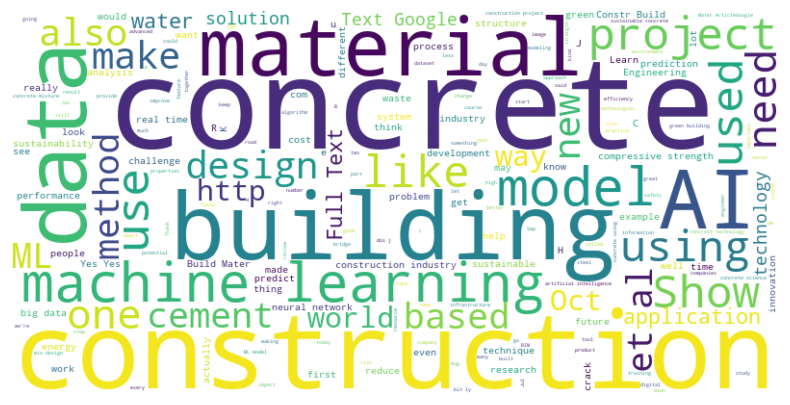

Sentiment Analysis Results:
Polarity: 0.138254857361924 (Scale: -1 to 1)
Subjectivity: 0.43989431637506793 (Scale: 0 to 1)


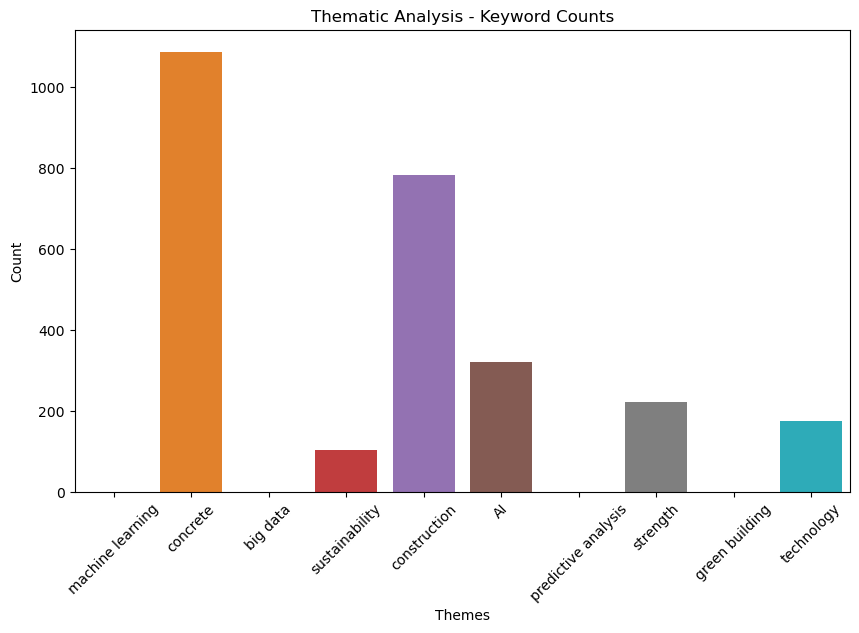

In [32]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Downloading necessary NLTK data (for stopwords)
nltk.download('punkt')
nltk.download('stopwords')

# Load and clean the aggregated text data
def load_aggregated_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

# Step 3.1: Create Word Cloud
def create_word_cloud(text):
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Step 3.2: Sentiment Analysis
def sentiment_analysis(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    print(f"Sentiment Analysis Results:\nPolarity: {polarity} (Scale: -1 to 1)\nSubjectivity: {subjectivity} (Scale: 0 to 1)")

# Step 3.3: Thematic Analysis (Simple Keyword-based)
def thematic_analysis(text, themes):
    word_list = nltk.word_tokenize(text.lower())
    theme_counts = {theme: word_list.count(theme.lower()) for theme in themes}

    # Plot the thematic analysis results
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(theme_counts.keys()), y=list(theme_counts.values()))
    plt.title('Thematic Analysis - Keyword Counts')
    plt.xlabel('Themes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Load the aggregated text
aggregated_text_file = 'aggregated_all_texts.txt'
text_data = load_aggregated_text(aggregated_text_file)

# Step 3.1: Generate Word Cloud
create_word_cloud(text_data)

# Step 3.2: Perform Sentiment Analysis
sentiment_analysis(text_data)

# Step 3.3: Perform Thematic Analysis (define themes)
themes = [
    'machine learning', 'concrete', 'big data', 'sustainability', 'construction',
    'AI', 'predictive analysis', 'strength', 'green building', 'technology'
]
thematic_analysis(text_data, themes)


### Step 4: Identification of the factors (Independent or dependent factors)

In [51]:
# Define independent and dependent factors
independent_factors = [
    "Concrete composition (e.g., cement, water content, aggregates)",
    "Environmental factors (e.g., temperature, humidity)",
    "Machine learning models (e.g., regression models, neural networks)",
    "Data availability (e.g., past construction projects)",
    "Construction methods (e.g., casting, curing techniques)",
    "Material properties (e.g., density, porosity)",
    "External loads (e.g., weight, environmental stress)",
    "Sustainability practices (e.g., recycled materials, eco-friendly methods)",
    "Technological advancements (e.g., 3D printing, IoT integration)",
    "Data preprocessing techniques (e.g., normalization, transformation)"
]

dependent_factors = [
    "Compressive strength of concrete",
    "Durability and longevity of structures",
    "Cost-effectiveness",
    "Sustainability metrics (e.g., carbon footprint, energy efficiency)",
    "Quality of construction (e.g., defect rates, performance under load)",
    "Time efficiency (e.g., construction duration, project delays)",
    "Safety metrics (e.g., accident rates, risk assessment)",
    "Economic impact (e.g., ROI, market value)",
    "User satisfaction (e.g., building usability, aesthetic value)",
    "Regulatory compliance (e.g., building codes, safety standards)"
]

# Print the results
print("Independent Factors:")
for factor in independent_factors:
    print(f"- {factor}")

print("\nDependent Factors:")
for factor in dependent_factors:
    print(f"- {factor}")


Independent Factors:
- Concrete composition (e.g., cement, water content, aggregates)
- Environmental factors (e.g., temperature, humidity)
- Machine learning models (e.g., regression models, neural networks)
- Data availability (e.g., past construction projects)
- Construction methods (e.g., casting, curing techniques)
- Material properties (e.g., density, porosity)
- External loads (e.g., weight, environmental stress)
- Sustainability practices (e.g., recycled materials, eco-friendly methods)
- Technological advancements (e.g., 3D printing, IoT integration)
- Data preprocessing techniques (e.g., normalization, transformation)

Dependent Factors:
- Compressive strength of concrete
- Durability and longevity of structures
- Cost-effectiveness
- Sustainability metrics (e.g., carbon footprint, energy efficiency)
- Quality of construction (e.g., defect rates, performance under load)
- Time efficiency (e.g., construction duration, project delays)
- Safety metrics (e.g., accident rates, ris